In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

RESEARCH_PATH='../lib/tf_od_api/models/research'
SLIM_PATH=f'{RESEARCH_PATH}/slim'
import sys
sys.path.append('..')
sys.path.append(RESEARCH_PATH)
sys.path.append(SLIM_PATH)

In [2]:
import random
from IPython.display import JSON

from lib.dataset.pascal_voc.pascal_voc_dataset import PascalVOCDataset
from lib.config import Config
from lib.dataset.plot import show_sample
from lib.prediction.model import Model
from lib.list_utils import chunks

In [3]:
cfg = Config('../config.yml')
train_chckpoints  = ['15120', '19389', '24261']

In [4]:
dataset = PascalVOCDataset('../dataset/test/samples')
samples = list(dataset.samples())

100%|██████████| 500/500 [00:00<00:00, 3059.37f/s]


In [5]:
show_sample(random.choice(samples))

In [6]:
def show_labels(labels):
    print('Labels:')
    [print(' - ' + ', '.join(it)) for it  in list(chunks(labels, 13))]

show_labels(cfg['labels'])

Labels:
 - As, 2s, 3s, 4s, 5s, 6s, 7s, 8s, 9s, 10s, Js, Qs, Ks
 - Ad, 2d, 3d, 4d, 5d, 6d, 7d, 8d, 9d, 10d, Jd, Qd, Kd
 - Ah, 2h, 3h, 4h, 5h, 6h, 7h, 8h, 9h, 10h, Jh, Qh, Kh
 - Ac, 2c, 3c, 4c, 5c, 7c, 6c, 8c, 9c, 10c, Jc, Qc, Kc


In [7]:
def create_model(checkpoint):
    model_path     = f'../models/inference_graph_{checkpoint}/frozen_inference_graph.pb'
    label_map_path = f'../dataset/label_map.pbtxt'
    labels         = cfg.property('labels')
    return Model(model_path, label_map_path, labels)

In [8]:
model = create_model(train_chckpoints[2])

In [9]:
predictions = model.predict_samples(samples[0:20], min_score=0.8)

100%|██████████| 20/20 [00:30<00:00,  1.51s/f]


../dataset/test/samples/2683559696.jpg


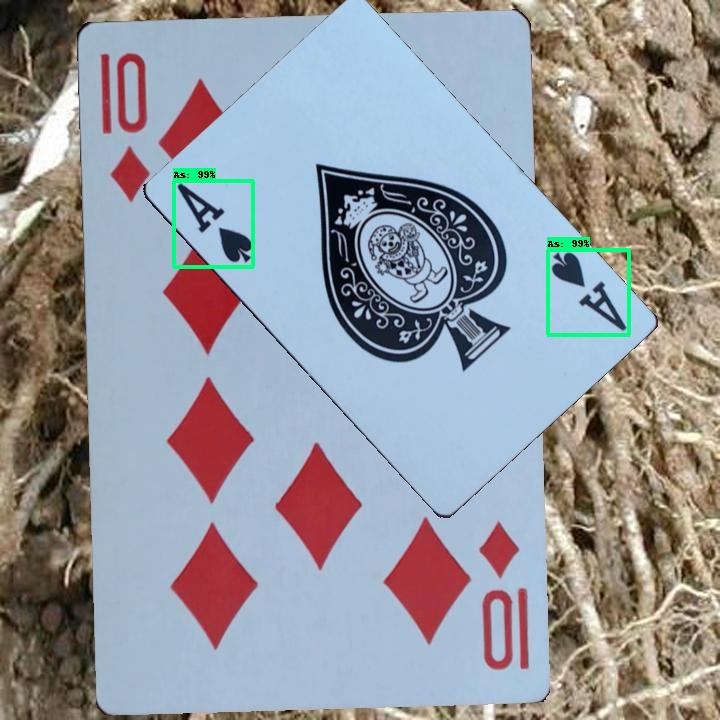

../dataset/test/samples/2745157915.jpg


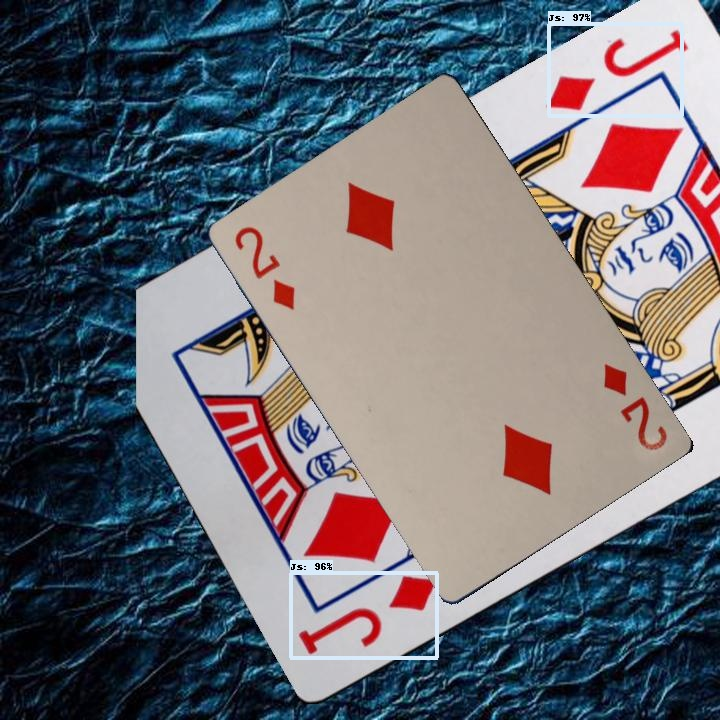

../dataset/test/samples/2635517291.jpg


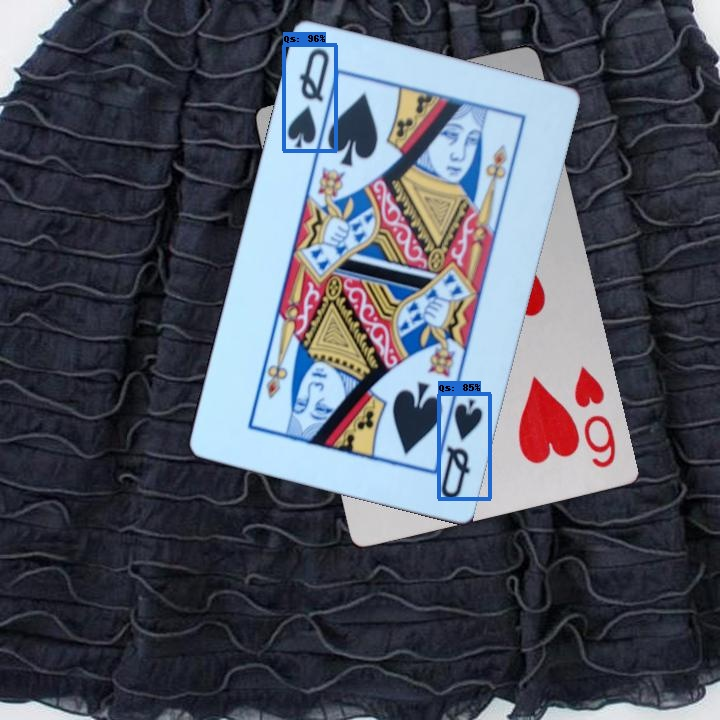

../dataset/test/samples/2915464952.jpg


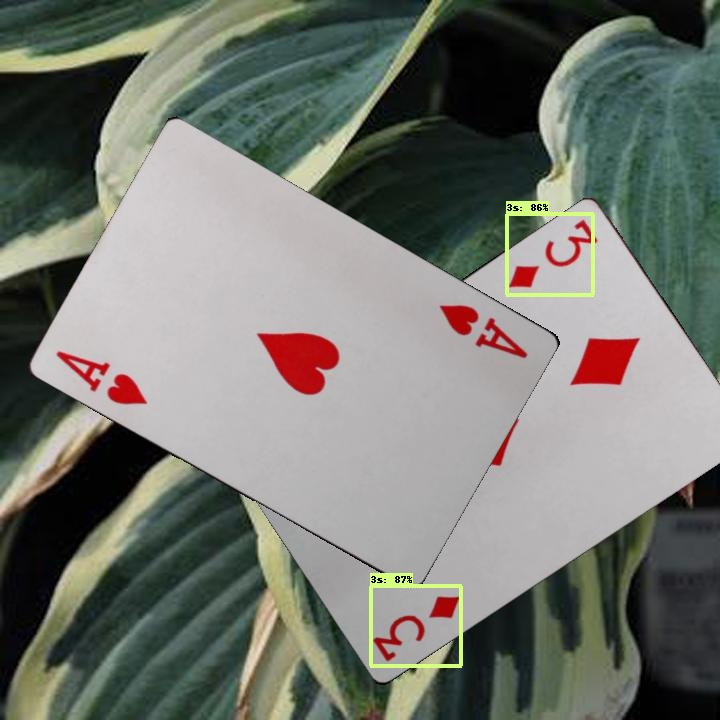

../dataset/test/samples/2328258160.jpg


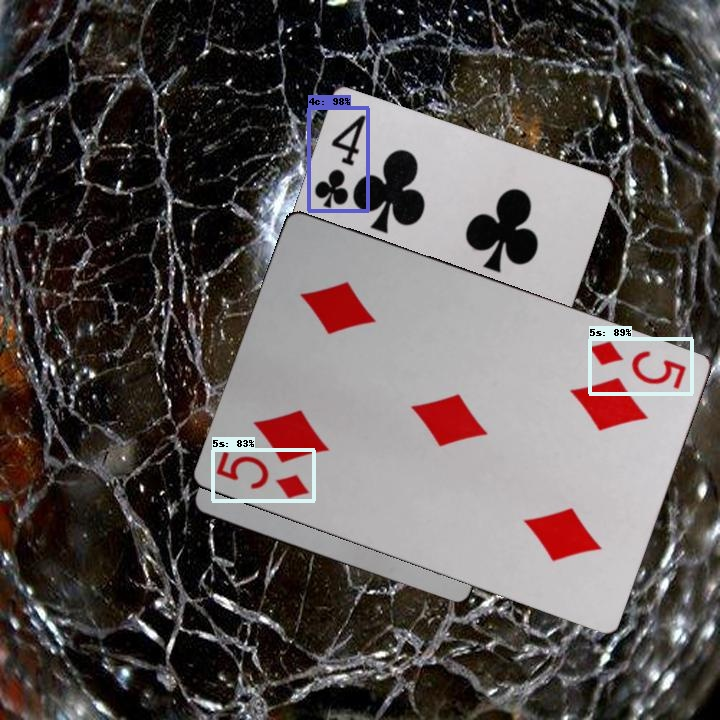

../dataset/test/samples/2167055137.jpg


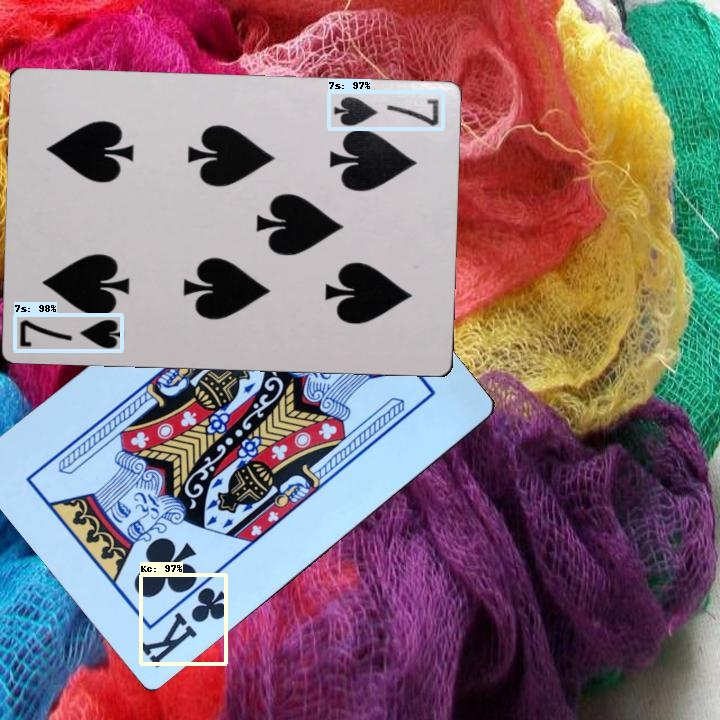

../dataset/test/samples/2326167954.jpg


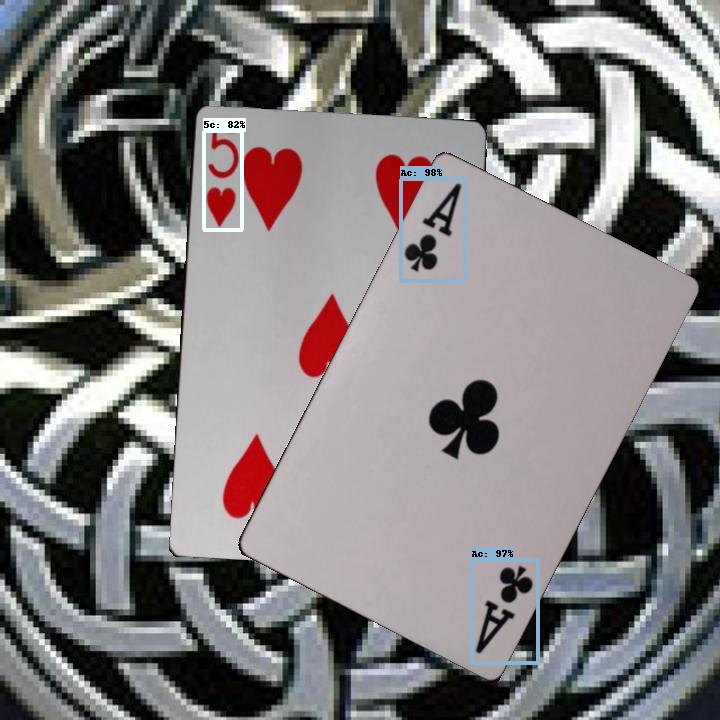

../dataset/test/samples/2300995617.jpg


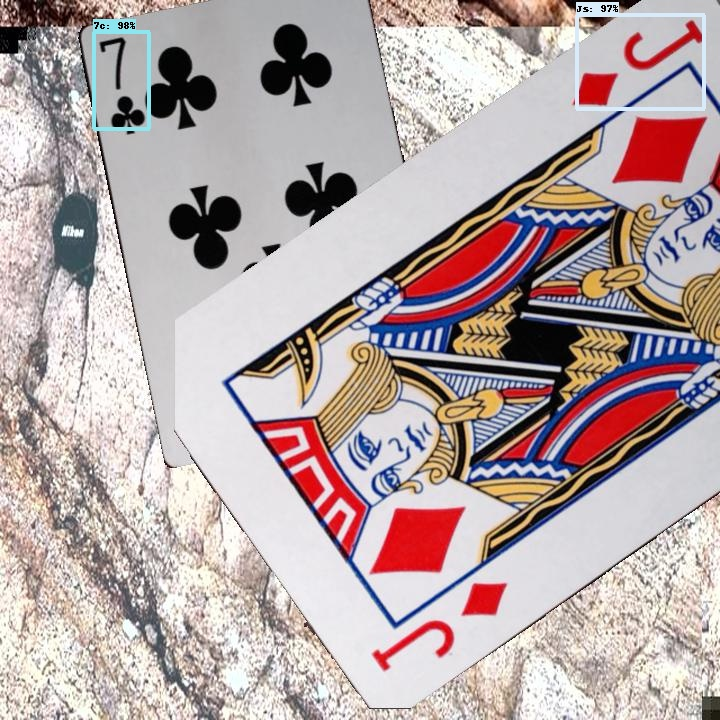

../dataset/test/samples/2842125306.jpg


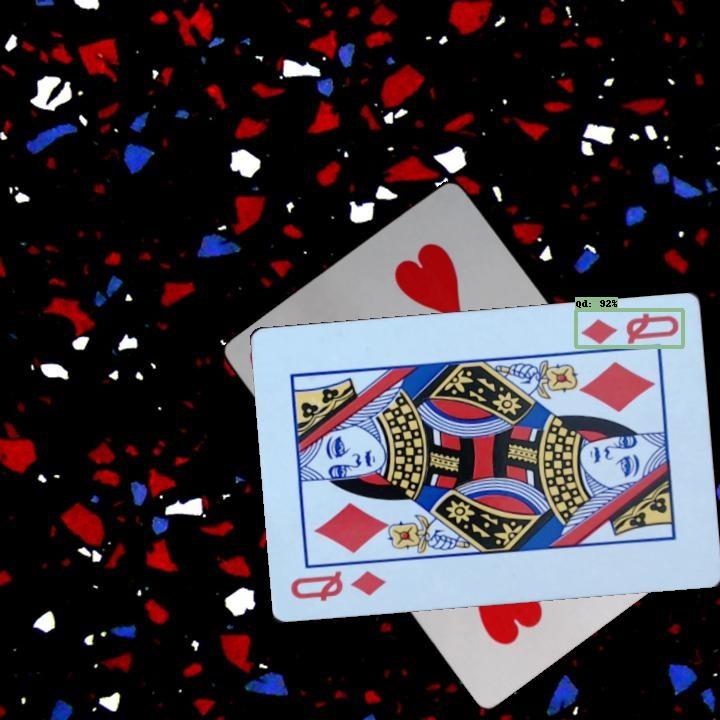

../dataset/test/samples/2088613125.jpg


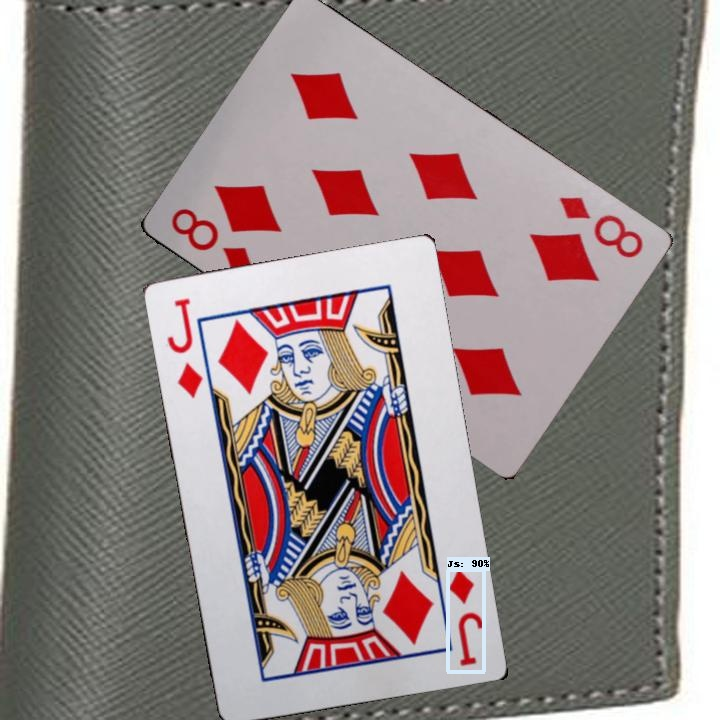

../dataset/test/samples/2012314233.jpg


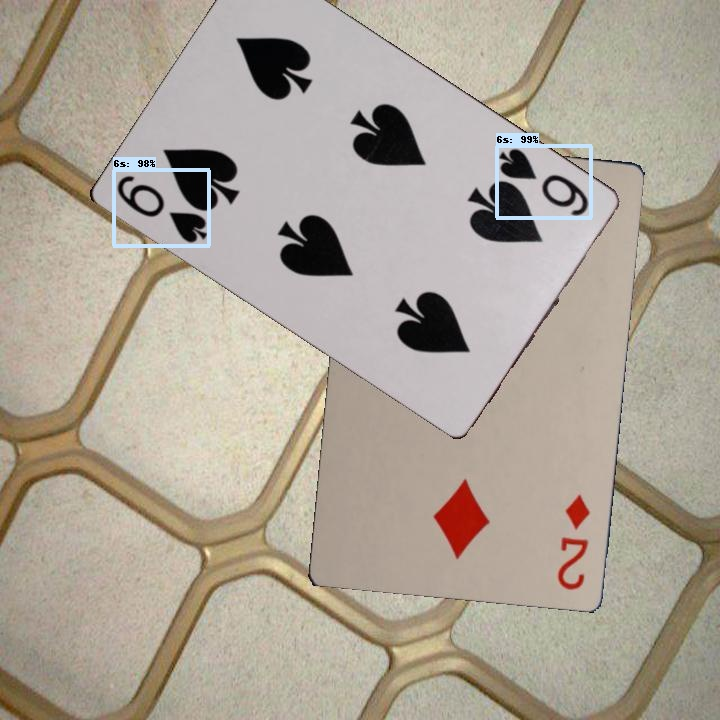

../dataset/test/samples/2239393703.jpg


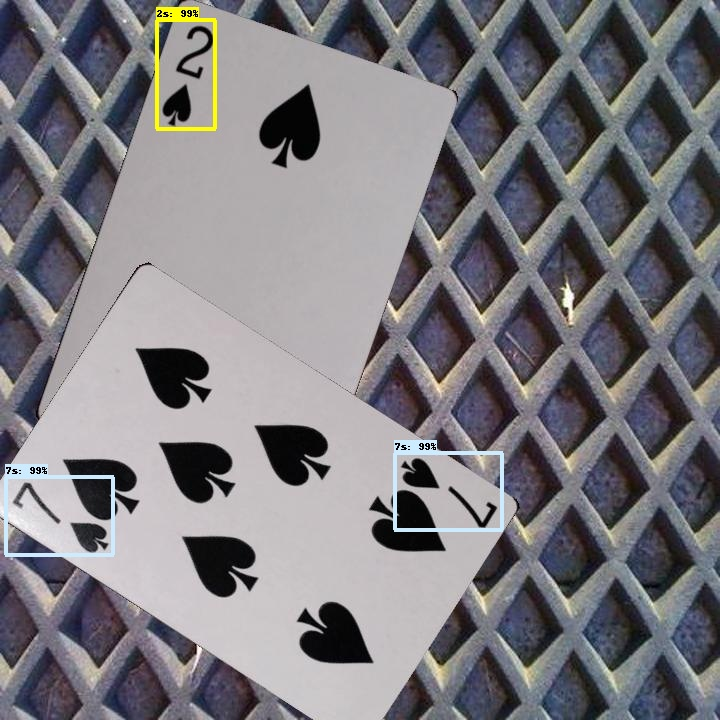

../dataset/test/samples/2354456306.jpg


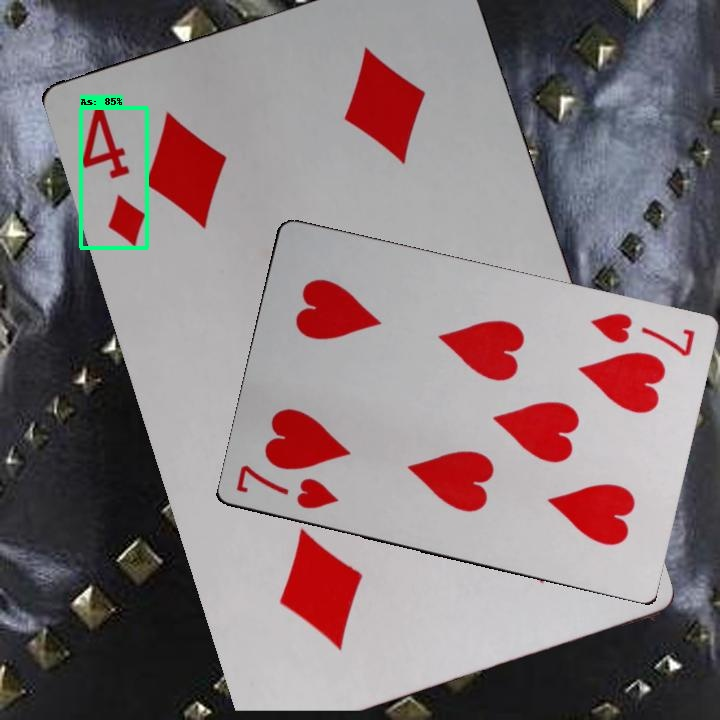

../dataset/test/samples/2770761951.jpg


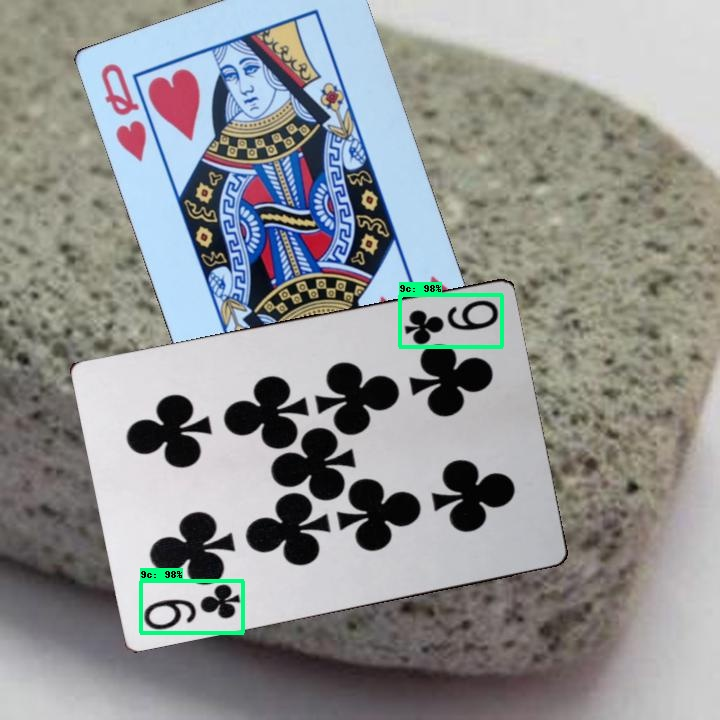

../dataset/test/samples/2550194667.jpg


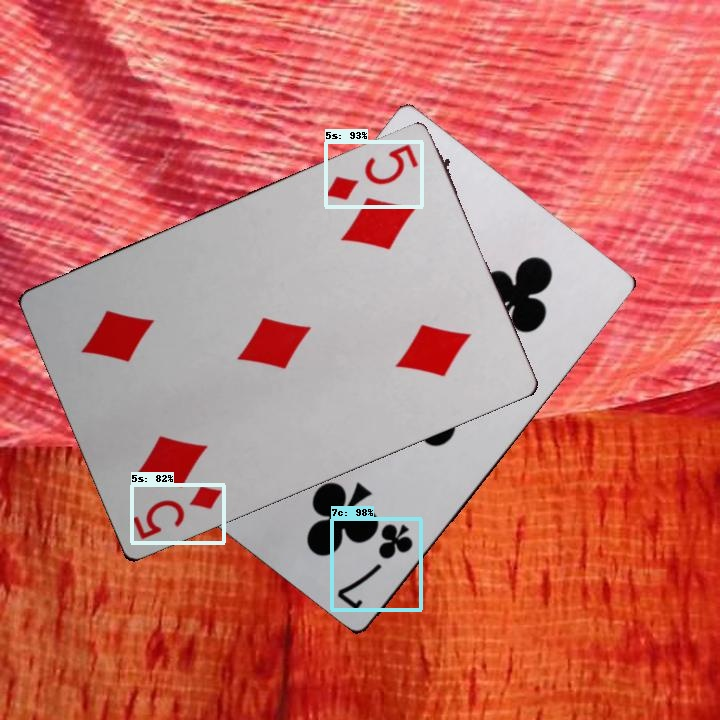

../dataset/test/samples/2639227237.jpg


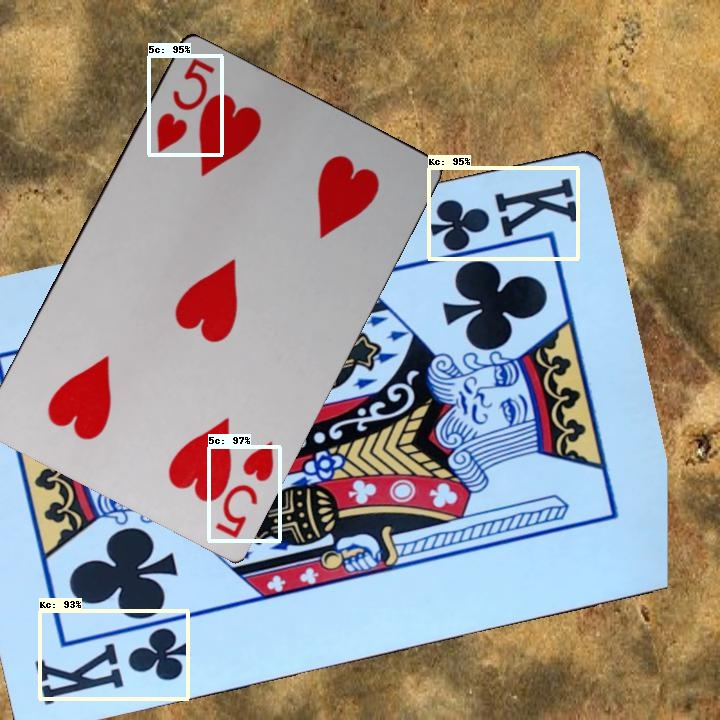

../dataset/test/samples/2419288461.jpg


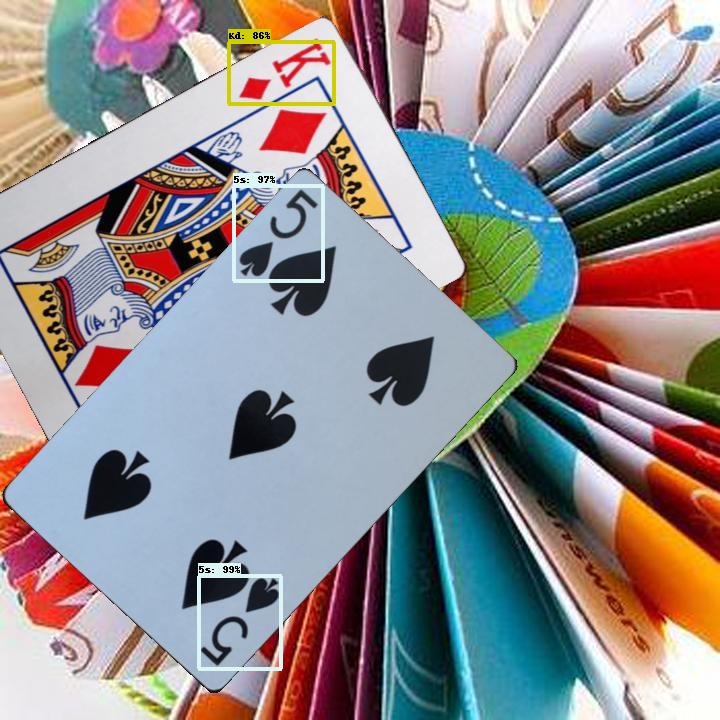

../dataset/test/samples/2205401059.jpg


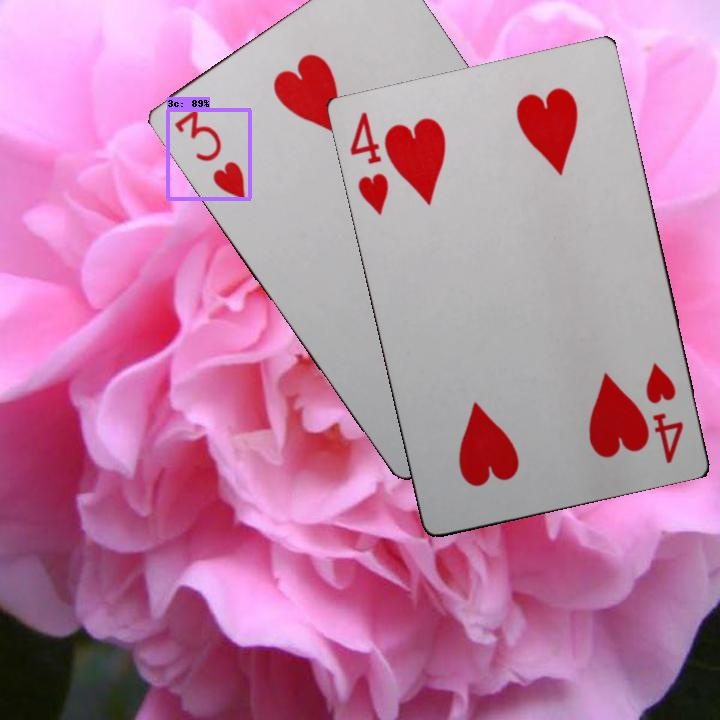

../dataset/test/samples/2501134277.jpg


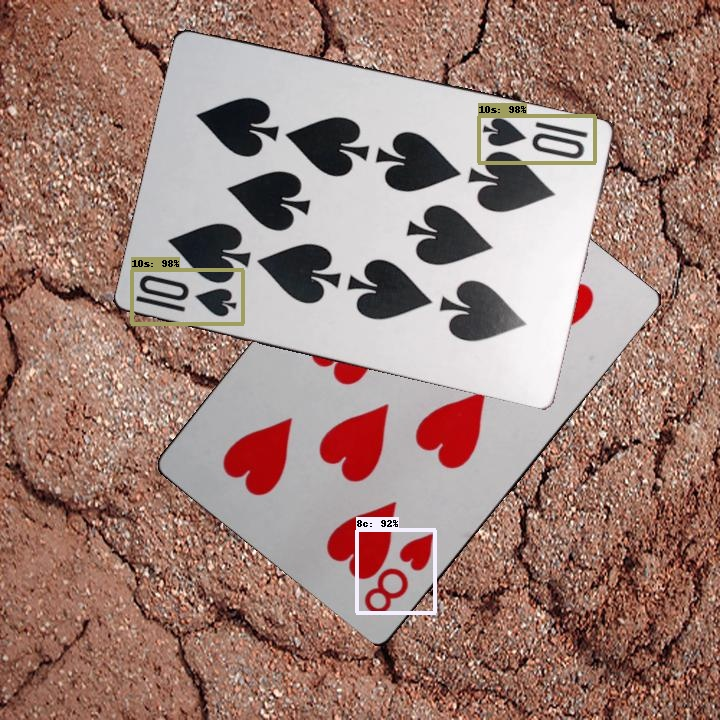

../dataset/test/samples/2869522861.jpg


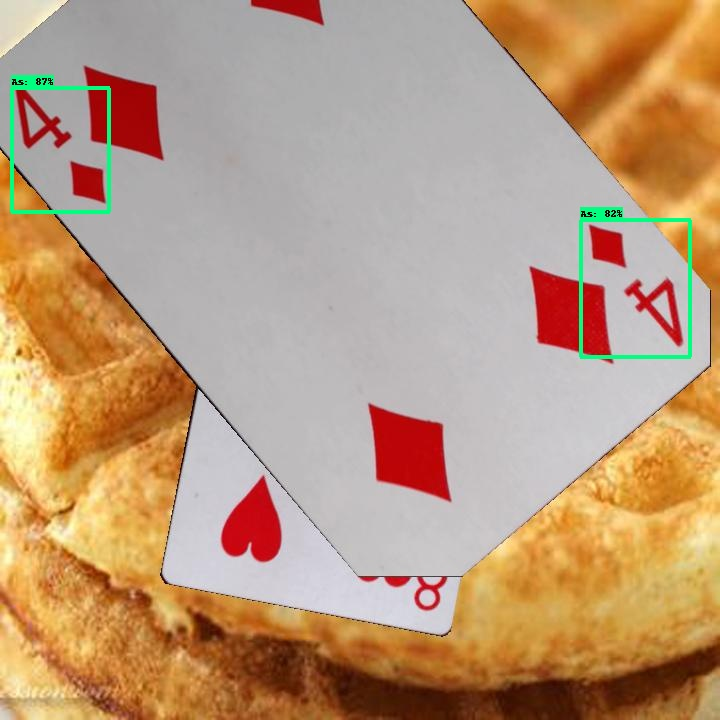

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
[f.show() for f in predictions]